## Analysis of Clinical Notes, GPT-Based Notes, and EHR Dataset for Cancer Symptom Detection with BERT Models

This analysis delves into the examination and processing of three distinct datasets—GPT-Based Notes, Gold standard corpus, and Electronic Health Record (EHR) data—specifically focusing on cancer symptom detection using BERT (Bidirectional Encoder Representations from Transformers) models.

## 1. **Investigating of GPT-Based Notes**
- The GPT-based dataset consists of 180 synthetic clinical notes created by ChatGPT-4. These notes serve as external validation for the following symptoms: 'Fatigue', 'Depressed Mood', 'Constipation', 'Anxiety', 'Swelling', 'Nausea', 'Appetite Loss', 'Pain', 'Numbness', 'Impaired Memory', 'Pruritus', 'Shortness of Breath', and 'Disturbed Sleep'.
## 2. **Exploring of Gold-Standard Corpus Notes**
- The Gold-Standard corpus comprises 1,112 clinical notes annotated by two experts in 13 cancer symptoms. These symptoms include: 'Fatigue', 'Depressed Mood', 'Constipation', 'Anxiety', 'Swelling', 'Nausea', 'Appetite Loss', 'Pain', 'Numbness', 'Impaired Memory', 'Pruritus', 'Shortness of Breath', and 'Disturbed Sleep'.
## 3. **Examining of  EHR per patients**

3.1.  **Analysis of the Entire Dataset**:
   - Examination and exploration of the entire dataset to extract insights and trends.

3.2. **Analysis of Specific Cancer Sites**:
   - In-depth analysis targeting specific cancer sites to uncover site-specific patterns and characteristics.

3.3. **Preprocessing for BERT Limitation**:
   - Preprocessing the dataset associated with specific cancer sites to adhere to BERT's tokenization limitation (512 tokens). This involves segmenting the text into smaller chunks for compatibility with BERT.

3.4. **Labeling for Symptom-BERT**:
   - Labeling the preprocessed dataset associated with specific cancer sites based on Symptom-BERT, a specialized BERT model trained for symptom detection and classification tasks.

Through these analyses and preprocessing steps, this section aims to derive actionable insights and prepare the data for advanced modeling and predictive tasks.

## 1-Analysis of GPT-Based Notes

### Data Loading and Cleaning with Pandas

1. **Import Libraries:**
   - **Libraries:** `pandas` as `pd` and `matplotlib.pyplot` as `plt`
   - **Purpose:** `pandas` is used for data manipulation and `matplotlib` for potential data visualization.

2. **Read Data from CSV:**
   - **Code:** `df_external = pd.read_csv('Chatgpt_corpus_14_symptoms__180_note_new.csv', encoding='ISO-8859-1')`
   - **Purpose:** Loads data from a CSV file using a specific encoding (ISO-8859-1), suitable for Western European text.

3. **Rename Column:**
   - **Code:** `df_external = df_external.rename(columns={'TEXT': 'Note'})`
   - **Purpose:** Renames the column 'TEXT' to 'Note' for clarity and better context.

4. **Drop Column:**
   - **Code:** `df_external = df_external.drop('Counted', axis=1)`
   - **Purpose:** Removes the column 'Counted' from the DataFrame, simplifying the dataset.

5. **Print Column Names:**
   - **Code:** `print(df_external.columns)`
   - **Purpose:** Displays the current column names in the DataFrame to verify the changes made.

### Summary

This script performs initial data loading, column renaming, and removal of unnecessary data from a DataFrame, setting up a clean dataset for further analysis.



In [65]:
import pandas as pd
import matplotlib.pyplot as plt
# Selecting symptom columns
symptoms = ['Fatigue', 'Depressed_Mood', 'Constipation', 'Anxiety', 'Swelling', 'Nausea', 'Appetite_Loss',
            'Pain', 'Numbness', 'Impaired_Memory', 'Pruritus', 'Shortness_of_Breath', 'Disturbed_Sleep']
df_external = pd.read_csv('Chatgpt_corpus_14_symptoms__180_note_new.csv', encoding='ISO-8859-1')
df_external = df_external.rename(columns={'TEXT': 'Note'})
df_external = df_external.drop('Counted', axis=1)# Drop the 'counted' column
df_external.drop_duplicates(subset=['Note'], inplace=True)
# Normalize symptom data: convert all NANs to '0' and any positive values to '1'
for symptom in symptoms:
    df[symptom] = df[symptom].fillna(0).clip(upper=1).astype(int)

print(df_external.columns)


Index(['note id', 'Note', 'Fatigue', 'Depressed_Mood', 'Constipation',
       'Anxiety', 'Swelling', 'Nausea', 'Appetite_Loss', 'Pain', 'Numbness',
       'Impaired_Memory', 'Pruritus', 'Shortness_of_Breath',
       'Disturbed_Sleep'],
      dtype='object')


### Text Cleaning Function in Python

1. **Import Regular Expressions Library:**
   - **Code:** `import re`
   - **Purpose:** Enables the use of regular expressions for string operations.

2. **Define Text Cleaning Function:**
   - **Function:** `clean_text(text)`
   - **Operations:**
     - Convert all text to lowercase to standardize the format.
     - Remove all non-alphabetic characters except spaces, simplifying the text.
     - Replace sequences of multiple spaces with a single space for consistency.
     - Remove non-ASCII characters to standardize on readable text.

3. **Apply Function to DataFrame:**
   - **Code:** `df_external['Note'] = df_external['Note'].apply(clean_text)`
   - **Purpose:** Cleans the text in the 'Note' column of the `df_external` DataFrame, ensuring the data is uniform and processed for further analysis.

### Summary

This script defines a function to clean text data by normalizing text format, removing extraneous characters, and standardizing whitespace, then applies this function to a specific column in a pandas DataFrame.


In [66]:
import re
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters except spaces
    text = re.sub(r'\s{2,}', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\x00-\x7f]+', ' ', text)  # Remove non-ASCII characters
    return text.strip()  # Trim whitespace from the start and end

df_external['Note'] = df_external['Note'].apply(clean_text)  # Apply cleaning function to 'Note' column
df_external.to_csv('df_Gold_Standard_Corpous.csv', index=False)
df_external.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 179
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   note id              178 non-null    int64  
 1   Note                 178 non-null    object 
 2   Fatigue              178 non-null    int64  
 3   Depressed_Mood       178 non-null    int64  
 4   Constipation         178 non-null    int64  
 5   Anxiety              178 non-null    int64  
 6   Swelling             178 non-null    int64  
 7   Nausea               178 non-null    int64  
 8   Appetite_Loss        178 non-null    int64  
 9   Pain                 177 non-null    float64
 10  Numbness             178 non-null    int64  
 11  Impaired_Memory      178 non-null    int64  
 12  Pruritus             178 non-null    int64  
 13  Shortness_of_Breath  178 non-null    int64  
 14  Disturbed_Sleep      178 non-null    int64  
dtypes: float64(1), int64(13), object(1)
memo

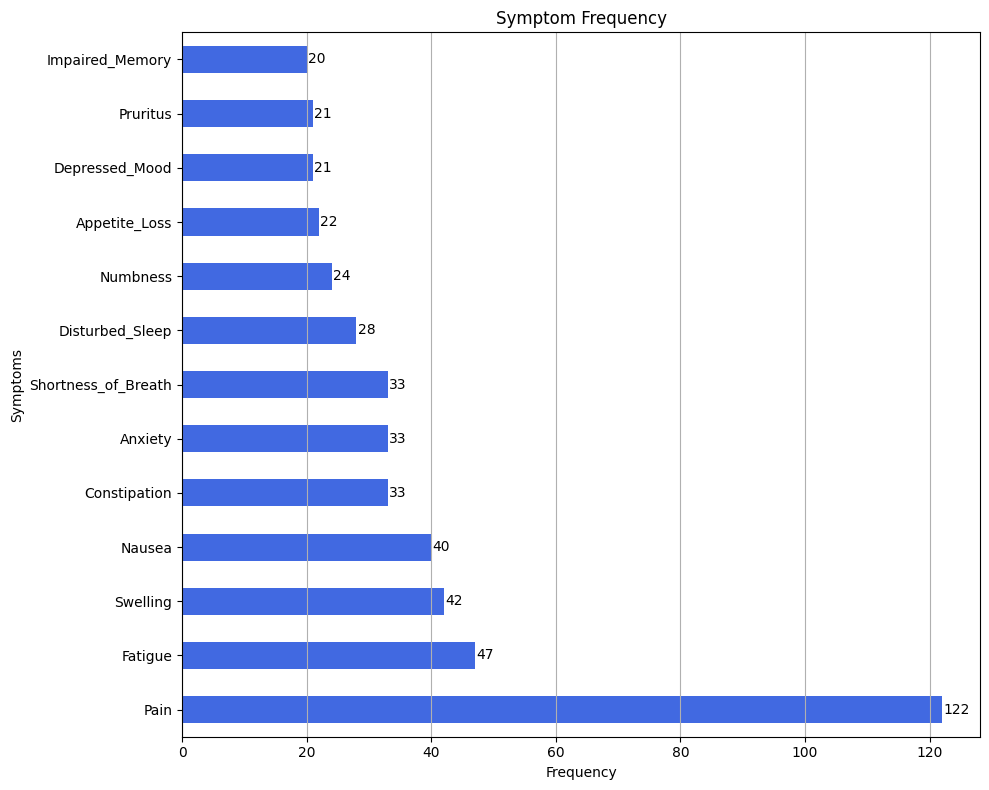

In [67]:
# Selecting symptom columns
symptoms = ['Fatigue', 'Depressed_Mood', 'Constipation', 'Anxiety', 'Swelling', 'Nausea', 'Appetite_Loss',
            'Pain', 'Numbness', 'Impaired_Memory', 'Pruritus', 'Shortness_of_Breath', 'Disturbed_Sleep']


# Calculate the frequency of each symptom and sort in descending order
symptom_counts = df_external[symptoms].sum().sort_values(ascending=False)

# Create a horizontal bar chart of the symptom frequencies
plt.figure(figsize=(10, 8))
ax = symptom_counts.plot(kind='barh', color='royalblue')
ax.set_title("Symptom Frequency")
ax.set_xlabel("Frequency")
ax.set_ylabel("Symptoms")
ax.grid(axis='x')

# Add labels to the bars with proper alignment
for bar in ax.patches:
    ax.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center')

# Ensure layout fits the figure and axes objects
plt.tight_layout()

# Save and show the plot
plt.savefig('symptom_frequency1.png', bbox_inches='tight')
plt.show()



### Text Data Analysis and Visualization with Pandas, Matplotlib, and Seaborn

1. **Import Libraries:**
   - `pandas` for data manipulation.
   - `matplotlib.pyplot` and `seaborn` for data visualization.

2. **Data Preparation:**
   - **Calculate Note Length:** The length of each text entry in the 'Note' column is computed and stored in a new column called 'Length'.
   - **Calculate Number of Tokens:** Each note is split by spaces to calculate the number of words (tokens), and this value is stored in 'Num_Tokens'.
   - **Calculate Density:** The text density (length divided by number of tokens) for each note is calculated and stored in 'Density'.

3. **Visualizations:**
   - **Note Length Distribution:**
     - A histogram with a Kernel Density Estimate (KDE) overlay shows the distribution of note lengths using Seaborn's `distplot`.
     - The plot is titled 'Distribution of Note Lengths' and labels for the x-axis ('Length of Note') and y-axis ('Frequency') are set.
   - **Number of Tokens per Note:**
     - A bar chart displays the number of tokens in each note.
     - This plot is titled 'Number of Tokens in Each Note' and includes axis labels for 'Note Index' and 'Number of Tokens'.
   - **Density of Notes:**
     - A line chart using Seaborn's `lineplot` function visualizes the density of each note over the DataFrame index.
     - The plot is titled 'Density of Notes' with appropriate labels for both axes.

### Summary

This script effectively utilizes data manipulation techniques to explore the textual content of notes within a DataFrame. It computes basic textual metrics and employs visualizations to provide insights into the text data, like the length, token count, and density of notes. These metrics and visualizations help in understanding the distribution and characteristics of the text data in a detailed and visual manner.


/tmp/ipykernel_525/1921684748.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_external['Length'], bins=20, kde=True)


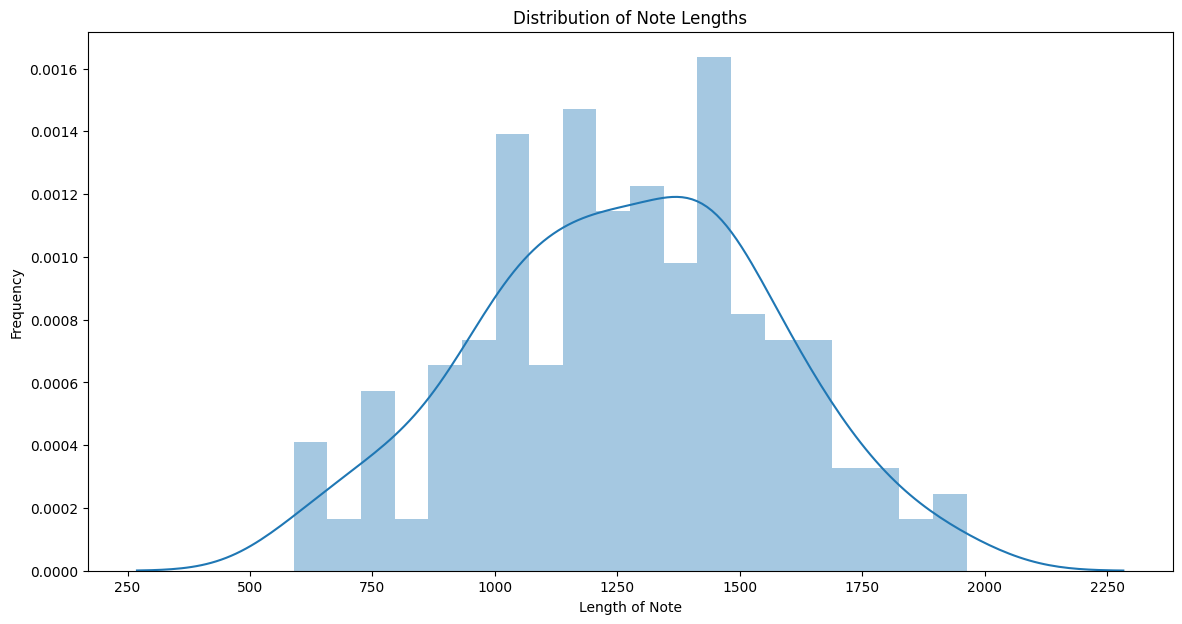

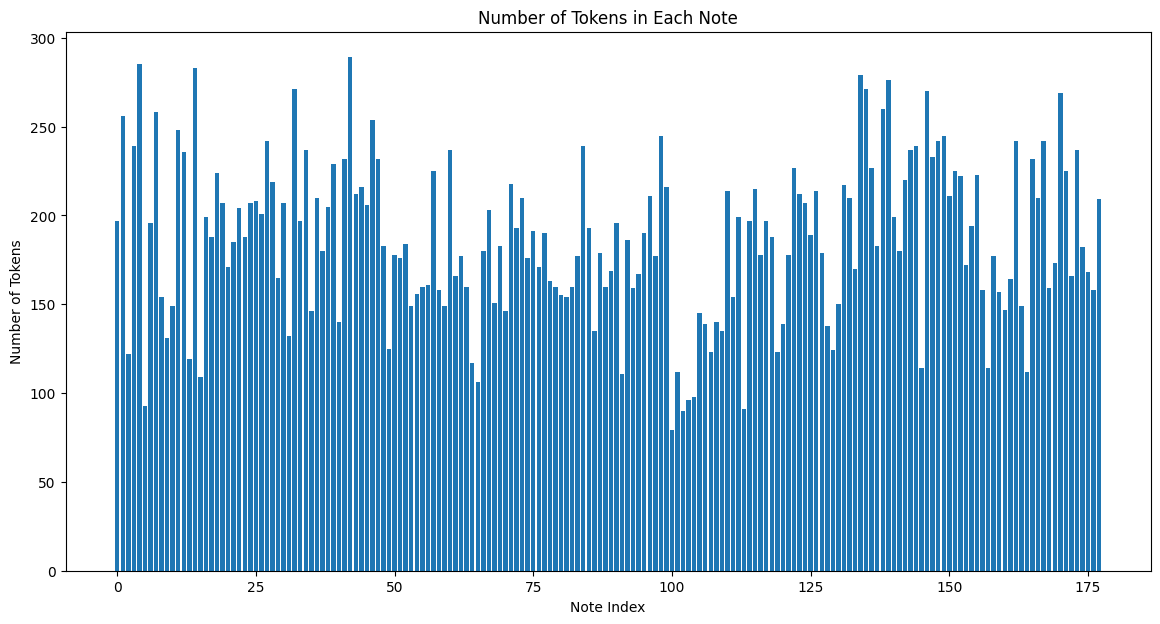

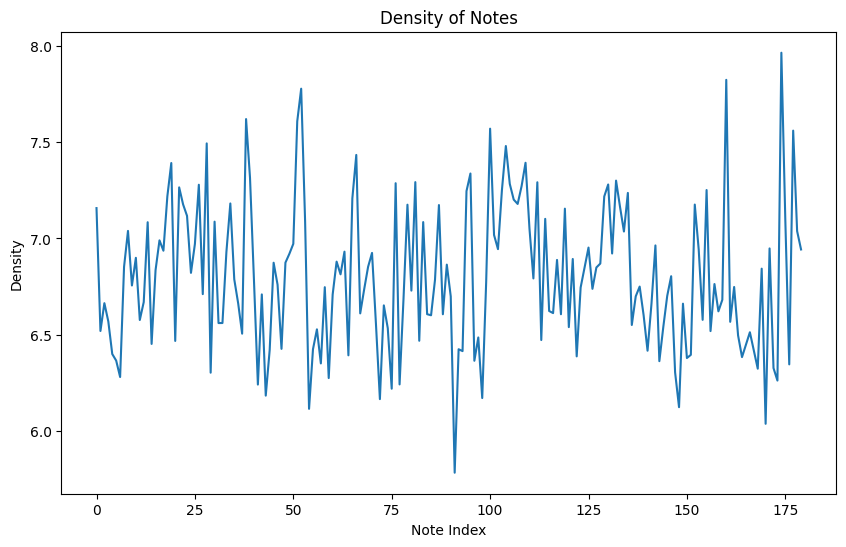

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_external is your DataFrame and 'Note' is the column with text data.

# Calculate the length of each note
df_external['Length'] = df_external['Note'].apply(len)

# Calculate the number of tokens in each note (simple split by space)
df_external['Num_Tokens'] = df_external['Note'].apply(lambda x: len(x.split()))

# Calculate the density of each note (length / number of tokens)
df_external['Density'] = df_external['Length'] / df_external['Num_Tokens']

# Visualizations
plt.figure(figsize=(14, 7))
sns.distplot(df_external['Length'], bins=20, kde=True)
plt.title('Distribution of Note Lengths')
plt.xlabel('Length of Note')
plt.ylabel('Frequency')
plt.show()

# Number of tokens in each note
plt.figure(figsize=(14, 7))  # Increased figure size for better visibility
plt.bar(range(len(df_external['Num_Tokens'])), df_external['Num_Tokens'])
plt.title('Number of Tokens in Each Note')
plt.xlabel('Note Index')
plt.ylabel('Number of Tokens')
# Here we do not set xticks due to large number of rows
plt.show()

# Density of each note
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_external.index, y=df_external['Density'])
plt.title('Density of Notes')
plt.xlabel('Note Index')
plt.ylabel('Density')
plt.show()


### Data Preparation and Scatter Plot Visualization

1. **Data Calculations:**
   - **Note Length:** Each entry in the 'Note' column of `df_external` DataFrame is processed to calculate its length (number of characters), which is stored in a new column called 'Length'.
   - **Number of Tokens:** The number of words (tokens) in each note is calculated by splitting the text by spaces, with results stored in 'Num_Tokens'.
   - **Density Calculation:** Density (length divided by the number of tokens) is computed for each note and stored in 'Density'.

2. **Visualization Setup:**
   - A Matplotlib figure is set up with a specified size of 18x10 inches to accommodate the plot.

3. **Scatter Plot Creation:**
   - A scatter plot is generated using Seaborn to visualize the relationship between 'Length' and 'Num_Tokens' of notes.
   - Plotted on the third panel of a 2x3 grid layout within the figure.
   - The plot is titled 'Scatter Plot of Length vs. Number of Tokens'.

4. **Layout Adjustment:**
   - `plt.tight_layout()` is called to adjust the spacing of the subplot grid to ensure that the plot is displayed neatly without any overlapping content.

### Summary

This code snippet efficiently handles preliminary data calculations necessary for analysis and then visually explores the relationship between the length and number of tokens in text data. The use of a scatter plot provides insights into the distribution and correlation between these two metrics, facilitating a better understanding of textual characteristics in the dataset.


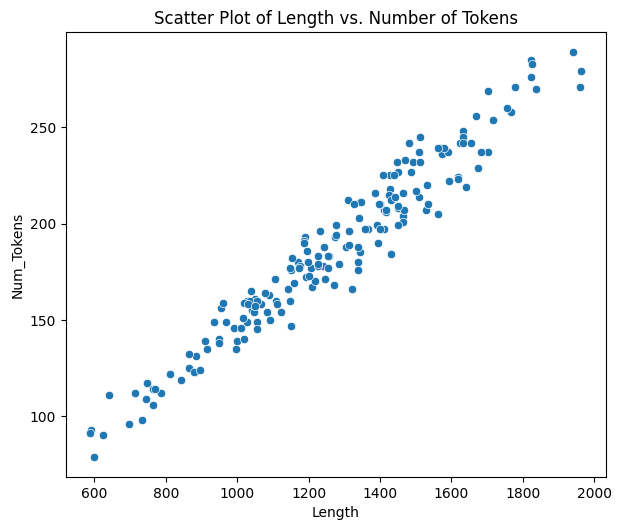

In [69]:
# Before creating visualizations, let's ensure we have all the necessary calculations
df_external['Length'] = df_external['Note'].apply(len)
df_external['Num_Tokens'] = df_external['Note'].apply(lambda x: len(x.split()))
df_external['Density'] = df_external['Length'] / df_external['Num_Tokens']

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Scatter Plot for Length vs. Number of Tokens
plt.subplot(2, 3, 3)
sns.scatterplot(x='Length', y='Num_Tokens', data=df_external)
plt.title('Scatter Plot of Length vs. Number of Tokens')

# Adjust layout
plt.tight_layout()

plt.show()

### Calculation and Display of Text Data Statistics

The Python script calculates various statistics for the `Length`, `Num_Tokens` (number of tokens), and `Density` of notes in the `df_external` DataFrame. Here’s how it’s structured:

1. **Calculate Length Statistics:**
   - **Minimum Length:** The shortest note's length.
   - **Maximum Length:** The longest note's length.
   - **Length Range:** The difference between the maximum and minimum lengths.

2. **Calculate Number of Tokens Statistics:**
   - **Minimum Number of Tokens:** The fewest tokens in a note.
   - **Maximum Number of Tokens:** The most tokens in a note.
   - **Tokens Range:** The range between the maximum and minimum number of tokens.

3. **Calculate Density Statistics:**
   - **Minimum Density:** The lowest density value among the notes.
   - **Maximum Density:** The highest density value among the notes.
   - **Density Range:** The difference between the maximum and minimum densities.

4. **Display All Statistics:**
   - **Print Length Statistics:** Iterates through the `length_stats` dictionary and prints each statistic.
   - **Print Number of Tokens Statistics:** Similar iteration and printing for `token_stats`.
   - **Print Density Statistics:** The same process is followed for the `density_stats`.

### Summary

This code segment methodically computes and outputs key statistics for text data within a DataFrame. These statistics include the length, number of tokens, and text density of notes, providing insights into the distribution and characteristics of the text data. Such analysis is crucial for understanding text complexity and preparing data for further natural language processing tasks.


In [70]:
length_stats = {
    'Min Length': df_external['Length'].min(),
    'Max Length': df_external['Length'].max(),
    'Length Range': df_external['Length'].max() - df_external['Length'].min()
}

token_stats = {
    'Min Num_Tokens': df_external['Num_Tokens'].min(),
    'Max Num_Tokens': df_external['Num_Tokens'].max(),
    'Num_Tokens Range': df_external['Num_Tokens'].max() - df_external['Num_Tokens'].min()
}

density_stats = {
    'Min Density': df_external['Density'].min(),
    'Max Density': df_external['Density'].max(),
    'Density Range': df_external['Density'].max() - df_external['Density'].min()
}

# Now we print all the statistics including density
print('Length Statistics:')
for key, value in length_stats.items():
    print(f"{key}: {value}")

print('\nNumber of Tokens Statistics:')
for key, value in token_stats.items():
    print(f"{key}: {value}")

print('\nDensity Statistics:')
for key, value in density_stats.items():
    print(f"{key}: {value}")


Length Statistics:
Min Length: 589
Max Length: 1963
Length Range: 1374

Number of Tokens Statistics:
Min Num_Tokens: 79
Max Num_Tokens: 289
Num_Tokens Range: 210

Density Statistics:
Min Density: 5.783783783783784
Max Density: 7.963855421686747
Density Range: 2.180071637902963


## 2-Analysis of Gold-Standard Corpus Notes
All of steps like before for new dataset.

In [71]:
import pandas as pd
import os
# Load and preprocess the dataset
df = pd.read_csv("new_corpus_14_symptoms_counted.csv")
df.rename(columns={'text': 'Note'}, inplace=True)
df.drop(columns=['Counted', 'Headache'], inplace=True)  # Drop multiple columns at once
df.drop_duplicates(subset=['Note'], inplace=True)

# Normalize symptom data: convert all NANs to '0' and any positive values to '1'
for symptom in symptoms:
    df[symptom] = df[symptom].fillna(0).clip(upper=1).astype(int)

print(df.columns)


Index(['Unnamed: 0', 'goldID', 'Note', 'Fatigue', 'Depressed_Mood',
       'Constipation', 'Anxiety', 'Swelling', 'Nausea', 'Appetite_Loss',
       'Pain', 'Numbness', 'Impaired_Memory', 'Pruritus',
       'Shortness_of_Breath', 'Disturbed_Sleep'],
      dtype='object')


In [72]:
import re
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters except spaces
    text = re.sub(r'\s{2,}', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\x00-\x7f]+', ' ', text)  # Remove non-ASCII characters
    return text.strip()  # Trim whitespace from the start and end

df['Note'] = df['Note'].apply(clean_text)  # Apply cleaning function to 'Note' column
df.to_csv('df_Gold_Standard_Corpous.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074 entries, 0 to 1111
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1074 non-null   int64 
 1   goldID               1074 non-null   int64 
 2   Note                 1074 non-null   object
 3   Fatigue              1074 non-null   int64 
 4   Depressed_Mood       1074 non-null   int64 
 5   Constipation         1074 non-null   int64 
 6   Anxiety              1074 non-null   int64 
 7   Swelling             1074 non-null   int64 
 8   Nausea               1074 non-null   int64 
 9   Appetite_Loss        1074 non-null   int64 
 10  Pain                 1074 non-null   int64 
 11  Numbness             1074 non-null   int64 
 12  Impaired_Memory      1074 non-null   int64 
 13  Pruritus             1074 non-null   int64 
 14  Shortness_of_Breath  1074 non-null   int64 
 15  Disturbed_Sleep      1074 non-null   int64 
dtypes: int

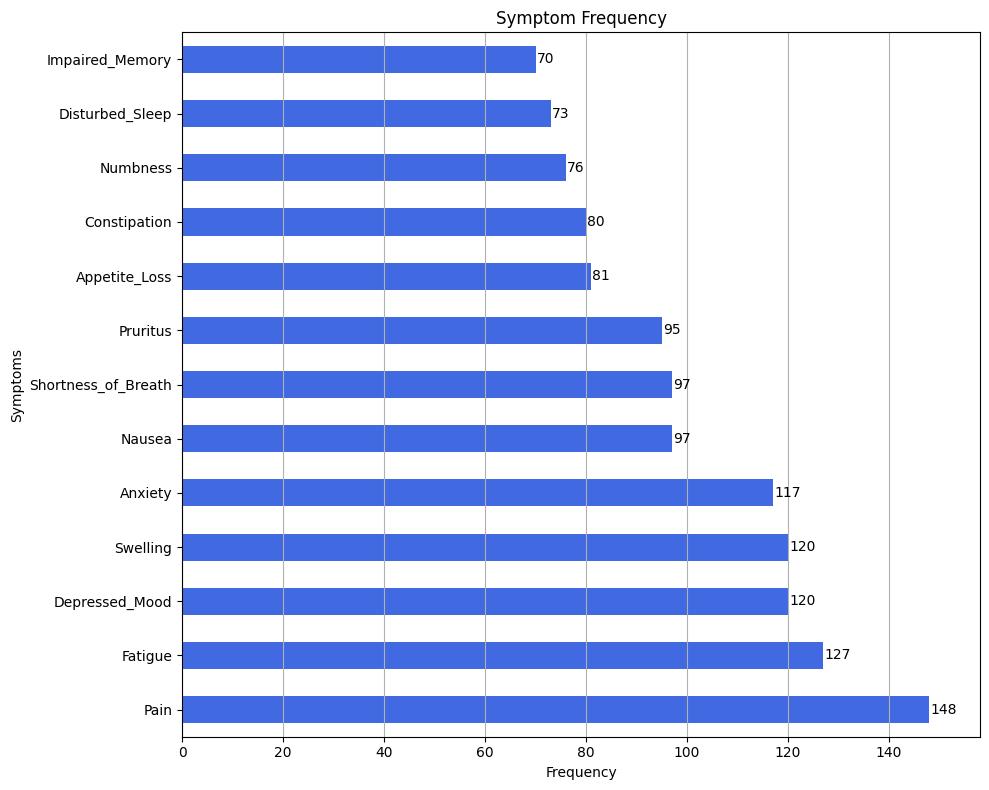

In [73]:
# Count the frequency of each symptom based on the 'Counted' column
symptom_counts = df[symptoms].sum(axis=0).sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
symptom_counts.plot(kind='barh', ax=ax, color='royalblue')

# Add labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    label_x_pos = width + 0.2  # Adjust this value for label positioning
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

# Settings for the chart
ax.set_xlim(0, max(symptom_counts) + 10)  # Adjust the limit as needed
ax.set_title("Symptom Frequency")
ax.set_xlabel("Frequency")
ax.set_ylabel("Symptoms")
ax.grid(axis='x')

plt.tight_layout()

# Save the figure as an image (e.g., PNG)
plt.savefig('symptom_frequency.png', bbox_inches='tight')

plt.show()


/tmp/ipykernel_525/2709327868.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_external['Length'], bins=20, kde=True)


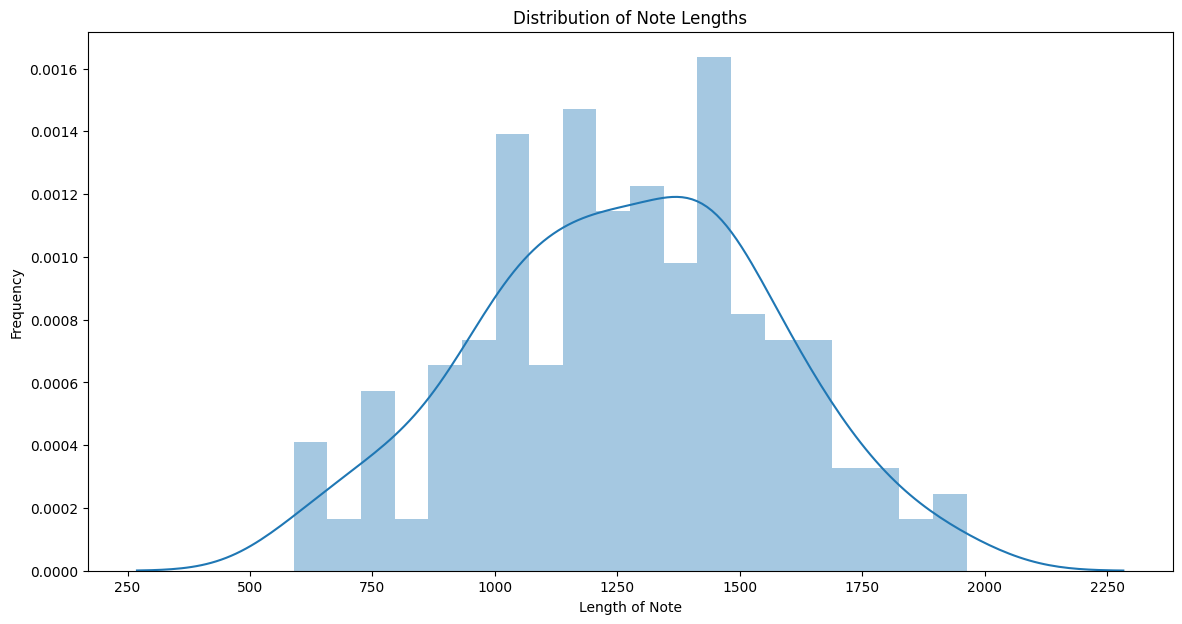

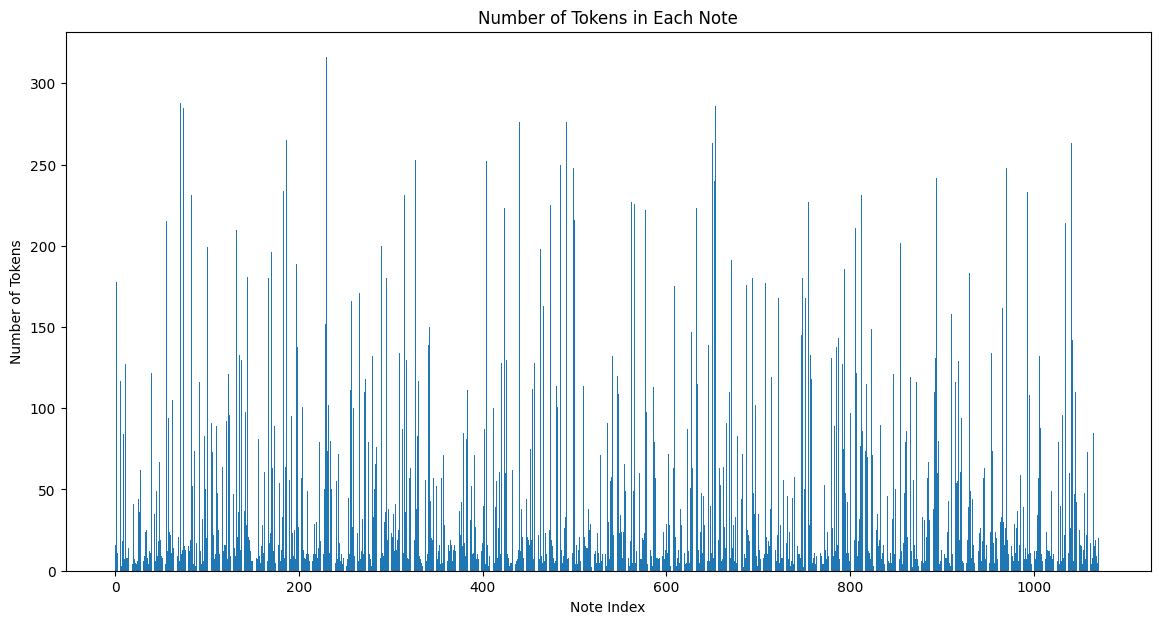

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_external is your DataFrame and 'Note' is the column with text data.

# Calculate the length of each note
df['Length'] = df['Note'].apply(len)

# Calculate the number of tokens in each note (simple split by space)
df['Num_Tokens'] = df['Note'].apply(lambda x: len(x.split()))

# Calculate the density of each note (length / number of tokens)
df['Density'] = df['Length'] / df['Num_Tokens']

# Visualizations
plt.figure(figsize=(14, 7))
sns.distplot(df_external['Length'], bins=20, kde=True)
plt.title('Distribution of Note Lengths')
plt.xlabel('Length of Note')
plt.ylabel('Frequency')
plt.show()

# Number of tokens in each note
plt.figure(figsize=(14, 7))  # Increased figure size for better visibility
plt.bar(range(len(df['Num_Tokens'])), df['Num_Tokens'])
plt.title('Number of Tokens in Each Note')
plt.xlabel('Note Index')
plt.ylabel('Number of Tokens')
# Here we do not set xticks due to large number of rows
plt.show()


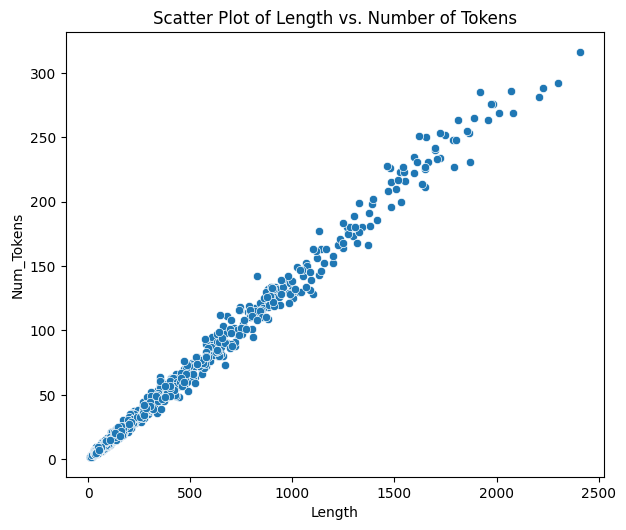

In [75]:
# Before creating visualizations, let's ensure we have all the necessary calculations
df['Length'] = df['Note'].apply(len)
df['Num_Tokens'] = df['Note'].apply(lambda x: len(x.split()))
df['Density'] = df['Length'] / df['Num_Tokens']

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Scatter Plot for Length vs. Number of Tokens
plt.subplot(2, 3, 3)
sns.scatterplot(x='Length', y='Num_Tokens', data=df)
plt.title('Scatter Plot of Length vs. Number of Tokens')

# Adjust layout
plt.tight_layout()

plt.show()

In [76]:
length_stats = {
    'Min Length': df['Length'].min(),
    'Max Length': df['Length'].max(),
    'Length Range': df['Length'].max() - df['Length'].min()
}

token_stats = {
    'Min Num_Tokens': df['Num_Tokens'].min(),
    'Max Num_Tokens': df['Num_Tokens'].max(),
    'Num_Tokens Range': df['Num_Tokens'].max() - df['Num_Tokens'].min()
}

density_stats = {
    'Min Density': df['Density'].min(),
    'Max Density': df['Density'].max(),
    'Density Range': df['Density'].max() - df['Density'].min()
}

# Now we print all the statistics including density
print('Length Statistics:')
for key, value in length_stats.items():
    print(f"{key}: {value}")

print('\nNumber of Tokens Statistics:')
for key, value in token_stats.items():
    print(f"{key}: {value}")

print('\nDensity Statistics:')
for key, value in density_stats.items():
    print(f"{key}: {value}")


Length Statistics:
Min Length: 11
Max Length: 2407
Length Range: 2396

Number of Tokens Statistics:
Min Num_Tokens: 2
Max Num_Tokens: 316
Num_Tokens Range: 314

Density Statistics:
Min Density: 4.0
Max Density: 11.5
Density Range: 7.5


## 3- Analysis of Dataset Per Patients (use case)

###  Working Directory and Data Loading
1. **Retrieve Working Directory:**
   - The script uses the `os` module to obtain and print the current working directory. This is useful for debugging or when the script's environment needs to be verified, especially before file operations.

2. **Load CSV Files:**
   - **First File:** Loads a CSV file from a specified absolute path. This path points to a deep directory structure, which likely contains specific project-related data.
   - **Second File:** Loads another CSV file named `P20_clean_15K_MRNs.csv` located in the script's execution directory or a predefined path in the system.


In [83]:
# Get the current working directory
import os
import pandas as pd
current_directory = os.getcwd()
# Print the current working directory
print("Current Working Directory:", current_directory)
# Load the uploaded CSV file
file_path = '/home/nzeinali/LSS/ihdr_sgilbertsonwhite_202006264/1703928_White_Expanded_Data_Request/1703928 Updated Data/1703928 Notes 20230424.csv'
df1 = pd.read_csv(file_path)
df2 = pd.read_csv('P20_clean_15K_MRNs.csv')

Current Working Directory: /home/nzeinali/LSS/ihdr_sgilbertsonwhite_202006264/Nahid/project2023


In [84]:
df1.columns.tolist()

['patient_ir_id',
 'PAT_ID',
 'Note_ID',
 'EncounterID',
 'NoteCSNID',
 'AuthorType',
 'Service',
 'NoteType',
 'NoteDate',
 'EncounterType',
 'NOTE_TXT']

In [85]:
df2.columns.tolist()

['Unnamed: 0',
 'mrn',
 'patient_ir_id',
 'birth_dts',
 'age',
 'patient_race_mrd_desc',
 'patient_gender_mrd_desc',
 'patient_marital_status_mrd_desc',
 'Date.of.Diagnosis',
 'Primary.Site.grp',
 'Stage',
 'Chemo',
 'Radiation',
 'Hormone',
 'Palliative.Proc',
 'Surgery',
 'dx_dts',
 'Disease.Category_ALLERGY',
 'Disease.Category_ANEMIA',
 'Disease.Category_ASTHMA',
 'Disease.Category_ATRIAL.FIBRILLATION',
 'Disease.Category_AUTOIMMUNE.DISEASES',
 'Disease.Category_BLINDNESS..VISUAL.IMPAIRMENT',
 'Disease.Category_BLOOD.AND.BLOOD.FORMING.ORGAN.DISEASES',
 'Disease.Category_BRADYCARDIAS.AND.CONDUCTION.DISEASES',
 'Disease.Category_CARDIAC.VALVE.DISEASES',
 'Disease.Category_CATARACT.AND.OTHER.LENS.DISEASES',
 'Disease.Category_CEREBROVASCULAR.DISEASE',
 'Disease.Category_CHROMOSOMAL.ABNORMALITIES',
 'Disease.Category_CHRONIC.INFECTIOUS.DISEASES',
 'Disease.Category_CHRONIC.KIDNEY.DISEASES',
 'Disease.Category_CHRONIC.LIVER.DISEASES',
 'Disease.Category_CHRONIC.PANCREAS..BILIARY.TRACT.A

### DataFrame Column Selection and Grouping

The following Python script snippet performs data extraction and transformation on a DataFrame `df2`:

1. **Define Selected Columns:**
   - A list named `selected_columns` is created, which specifies the columns to be extracted from `df2`. These columns include identifiers, demographic data, diagnosis date, primary site group, and treatment types such as chemotherapy, radiation, hormone therapy, and surgery.

2. **Create New DataFrame:**
   - A new DataFrame `df_selected` is created by selecting the specified columns from `df2`. This operation filters the data to only include relevant information as defined in the `selected_columns` list.

3. **Group Data by MRN:**
   - The data in `df_selected` is grouped by the 'mrn' (medical record number) to aggregate entries per patient. The size of each group is calculated to determine the number of records per MRN.
   - This grouping results in a new DataFrame `df_selected_grouped` with two columns: 'mrn' and 'count', where 'count' represents the number of entries for each MRN.

### Summary

This script is crucial for simplifying the dataset to focus on specific attributes and for analyzing the frequency of medical records per patient, aiding in data-driven decisions regarding patient treatment and management.


In [86]:
selected_columns = [
    'mrn',
    'patient_ir_id',
    'birth_dts',
    'age',
    'patient_race_mrd_desc',
    'patient_gender_mrd_desc',
    'patient_marital_status_mrd_desc',
    'Date.of.Diagnosis',
    'Primary.Site.grp',
    'Chemo',
    'Radiation',
    'Hormone',
    'Surgery'
]

# Create a new DataFrame with only the selected columns
df_selected = df2[selected_columns]
df_selected_grouped = df_selected.groupby('mrn').size().reset_index(name='count')

### Count Unique MRNs

The code calculates the total number of unique MRNs in the `df_selected` DataFrame using the `nunique()` method applied to the 'mrn' column. It then prints this count, displaying the number of distinct patients represented in the data.


In [88]:
count_unique_mrns = df_selected['mrn'].nunique()
print("Number of unique MRNs:", count_unique_mrns)

Number of unique MRNs: 15012


### Merging Datasets and Data Processing

The code performs the following operations:

1. **Data Merging:**
   - Merges `df_selected` with another DataFrame (`df`) on the column 'patient_ir_id' using a left join. This operation combines related records from two datasets based on the patient ID, preserving all records from `df_selected`.
   - The resulting merged DataFrame, `merged_df_all`, includes additional columns 'Note_ID' and 'NOTE_TXT' from `df`.

2. **Group and Filter Data:**
   - The data in `merged_df_all` is grouped by 'mrn', and the first entry of each group is retained using the `first()` method. This helps in getting a snapshot of each patient's first record.
   - Filters out rows where 'NOTE_TXT' is NaN, ensuring that only entries with complete note text are retained in `grouped_snapshot_all`.
3. **Save to CSV:**
   - The DataFrame `grouped_snapshot_all` is saved to a CSV file named 'grouped_snapshot_all.csv'. This operation does not include the index column in the output file, ensuring a clean, table-only format.

4. **Print Columns:**
   - Prints the names of the columns in the `grouped_snapshot_all` DataFrame, providing a quick reference to the structure and data types of the saved file.


### Summary

This process integrates and condenses patient data from multiple sources, focusing on providing a clear and complete snapshot of each patient's information related to their medical records.


In [140]:
# Merge datasets on 'patient_ir_id' with a left join
merged_df_all= pd.merge(df_selected, df[['patient_ir_id', 'Note_ID','NOTE_TXT']], on='patient_ir_id', how='left')
grouped_snapshot_all = merged_df_all.groupby('mrn').first().reset_index()
grouped_snapshot_all = grouped_snapshot_all.dropna(subset=['NOTE_TXT'])
grouped_snapshot_all.to_csv('grouped_snapshot_all.csv', index=False)
print(grouped_snapshot_all.columns)

Index(['mrn', 'patient_ir_id', 'birth_dts', 'age', 'patient_race_mrd_desc',
       'patient_gender_mrd_desc', 'patient_marital_status_mrd_desc',
       'Date.of.Diagnosis', 'Primary.Site.grp', 'Chemo', 'Radiation',
       'Hormone', 'Surgery', 'Note_ID', 'NOTE_TXT'],
      dtype='object')


### Create DataFrame for Cancer Citation Statistics

This code snippet constructs a DataFrame, `df_cancer_cite`, which includes:
- **Count:** Number of citations for each cancer type.
- **Percentage:** Proportion of each cancer type's citations relative to the total, calculated as a percentage.

The resulting DataFrame is displayed, providing insights into the distribution of cancer citations.


In [142]:
df_cancer_cite = pd.DataFrame({
    'Count': group_counts,
    'Percentage': 100 * group_counts / group_counts.sum()
})

df_cancer_cite

,Count,Percentage
digestive,1684,19.835100
female.genital,1591,18.739694
respiratory,905,10.659600
breast,816,9.611307
urinary,666,7.844523
skin,521,6.136631
male.genital,453,5.335689
lip,402,4.734982
brain,357,4.204947
hematopoietic,273,3.215548


### Calculate and Aggregate Treatment Data

This code segment processes treatment data by performing the following steps:

1. **Iterate Over Treatment Columns:**
   - It iterates over a predefined list of treatment types (`columns`), which includes 'Chemo', 'Radiation', 'Hormone', and 'Surgery'.

2. **Calculate Statistics:**
   - For each treatment type, the code calculates the count of 'Yes' and 'No' responses using `value_counts()`.
   - A new DataFrame (`df_treatment`) is created for each treatment type to store the counts and their respective percentages of the total.

3. **Append Results:**
   - Each DataFrame created in the loop is appended to a list (`results`).

4. **Concatenate DataFrames:**
   - All the DataFrames in the `results` list are concatenated into a single DataFrame, `df_treatment`, which includes all treatment types and their statistics.

### Summary

The resulting DataFrame, `df_treatment`, provides a comprehensive view of patient responses for various treatments, showing both counts and percentages, which aids in the analysis of treatment distribution.


In [143]:
columns = ['Chemo', 'Radiation', 'Hormone', 'Surgery']
results = []

for column in columns:
    # Calculate counts for 'Yes' and 'No'
    count_series = grouped_snapshot_all[column].value_counts()
    # Create a DataFrame to store counts and percentages
    df_treatment = pd.DataFrame({
        'Treatment_Type': column,
        'Treatment_Value': count_series.index,
        'Count': count_series.values,
        'Percentage': 100 * count_series / count_series.sum()
    })
    results.append(df_treatment)

# Concatenate all results into a single DataFrame
df_treatment = pd.concat(results, ignore_index=True)
df_treatment

,Treatment_Type,Treatment_Value,Count,Percentage
0,Chemo,no,4654,54.817432
1,Chemo,yes,3784,44.570082
2,Chemo,unknown,52,0.612485
3,Radiation,no,5770,67.962309
4,Radiation,yes,2720,32.037691
5,Hormone,no,7426,87.467609
6,Hormone,yes,1050,12.367491
7,Hormone,unknown,14,0.164900
8,Surgery,yes,5941,69.976443
9,Surgery,no,2548,30.011779


### Calculate and Tabulate Race Distribution

This code performs the following operations to analyze race data:

1. **Count Race Descriptions:**
   - Counts of each race description are computed from the `grouped_snapshot_all` DataFrame. It includes the counts of NaN values to ensure comprehensive data coverage.

2. **Create Data Table:**
   - A new DataFrame, `df_race`, is created which organizes the race descriptions along with their respective counts and percentages of the total:
     - `Race_Description`: Contains the categories of race from the dataset.
     - `Count`: The number of occurrences of each race category.
     - `Percentage`: The proportion of each category relative to the total, expressed as a percentage.

### Summary

The resulting DataFrame, `df_race`, provides a detailed view of the racial composition of the dataset, showcasing both absolute numbers and their relative frequencies. This helps in understanding the demographic distribution within the data.


In [144]:
# Calculate counts for each race description
race_counts = grouped_snapshot_all['patient_race_mrd_desc'].value_counts(dropna=False)  # includes NaN values if any
# Create a DataFrame to store counts and percentages
df_race = pd.DataFrame({
    'Race_Description': race_counts.index,
    'Count': race_counts.values,
    'Percentage': 100 * race_counts / race_counts.sum()
})
df_race


,Race_Description,Count,Percentage
White,White,7907,93.133098
Black or African American,Black or African American,203,2.391048
Refuse to Answer,Refuse to Answer,115,1.354535
Other,Other,115,1.354535
Asian,Asian,82,0.965842
Multiple Race,Multiple Race,27,0.318021
American Indian or Alaska Native,American Indian or Alaska Native,23,0.270907
Unknown,Unknown,7,0.082450
No information,No information,6,0.070671
Native Hawaiian or Other Pacific Islander,Native Hawaiian or Other Pacific Islander,5,0.058893


### Gender Distribution Analysis

This code snippet is designed to analyze gender distribution within a dataset:

1. **Calculate Gender Counts:**
   - It computes the number of records for each gender category using `value_counts()`, which tallies entries in the `grouped_snapshot_all` DataFrame's `patient_gender_mrd_desc` column.

2. **Calculate Percentages:**
   - Percentages for each gender are calculated based on their proportion in the dataset. This is achieved by setting `normalize=True` in the `value_counts()` method and multiplying by 100.

3. **Create and Display DataFrame:**
   - A new DataFrame, `df_gender`, is constructed to neatly organize both the counts and percentages of each gender:
     - `Count`: Numeric counts of each gender.
     - `Percentage`: Corresponding percentages that illustrate the representation of each gender within the data.

### Summary

The resulting DataFrame, `df_gender`, provides a comprehensive view of gender distribution, enabling clear visual and numerical understanding of gender representation in the data.


In [145]:
gender_counts = grouped_snapshot_all['patient_gender_mrd_desc'].value_counts()

# Calculate percentages for each gender description
gender_percentages = grouped_snapshot_all['patient_gender_mrd_desc'].value_counts(normalize=True) * 100

# Create a DataFrame to display both counts and percentages neatly
df_gender = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percentages
})

# Print the DataFrame
df_gender

,Count,Percentage
Female,4793,56.454653
Male,3697,43.545347


### Marital Status Distribution Analysis

This code snippet is structured to analyze the distribution of marital status within a dataset:

1. **Calculate Marital Status Counts:**
   - It computes the counts for each marital status category from the `grouped_snapshot_all` DataFrame's `patient_marital_status_mrd_desc` column using the `value_counts()` method.

2. **Calculate Percentages:**
   - The percentages for each marital status are calculated by setting `normalize=True` in the `value_counts()` method, which then multiplies the result by 100 to convert it to a percentage format.

3. **Create and Display DataFrame:**
   - A DataFrame, `df_marital`, is created to organize and display the counts and percentages for each marital status:
     - `Count`: The numeric counts of each marital status category.
     - `Percentage`: The relative proportions of each category, showing how they compare within the dataset.

### Summary

The `df_marital` DataFrame provides a detailed view of the marital status composition of the dataset, allowing for easy comparison and understanding of the distribution of marital statuses among the patients.


In [116]:
marital_counts = grouped_snapshot_all['patient_marital_status_mrd_desc'].value_counts()

# Calculate percentages for each gender description
marital_percentages = grouped_snapshot_all['patient_marital_status_mrd_desc'].value_counts(normalize=True) * 100

# Create a DataFrame to display both counts and percentages neatly
df_marital = pd.DataFrame({
    'Count': marital_counts,
    'Percentage': marital_percentages
})

df_marital

,Count,Percentage
Married,4892,57.620730
Never Married,1415,16.666667
Widowed,807,9.505300
Divorced,687,8.091873
Unknown,511,6.018846
Legally Separated,89,1.048292
No Information,47,0.553592
Domestic partner,42,0.494700


### Age Distribution Analysis and Visualization

This code segment conducts a statistical analysis of age data and visualizes it using a histogram:

1. **Display Basic Age Statistics:**
   - The script prints basic statistical measures (e.g., mean, median, min, max) for the `age` column of the `grouped_snapshot_all` DataFrame by using the `describe()` method. This provides a quick summary of age-related metrics in the dataset.

2. **Histogram Visualization:**
   - A histogram is generated to visually represent the distribution of age among patients. The histogram is constructed with 20 bins, providing a detailed view of the age frequency distribution.
   - The histogram is titled 'Age Distribution' and includes labels for both axes: 'Age' for the x-axis and 'Number of Patients' for the y-axis.

### Summary

This script effectively combines descriptive statistics and graphical visualization to offer a comprehensive view of the age distribution in the patient data. This aids in understanding demographic trends and patterns within the dataset.


count    8490.000000
mean       61.418492
std        13.791158
min        17.000000
25%        53.000000
50%        62.000000
75%        71.000000
max       103.000000
Name: age, dtype: float64


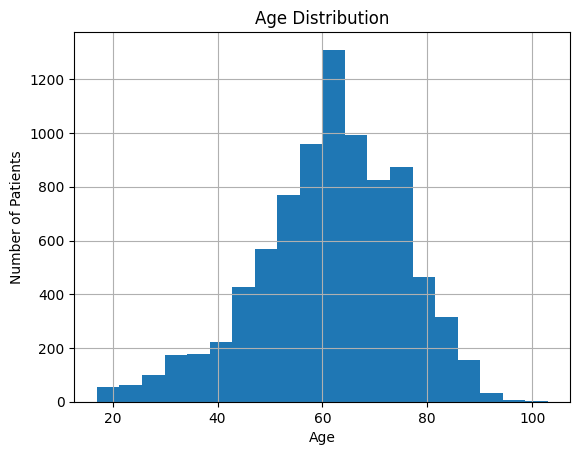

In [117]:
# For a more visual representation, you can plot a histogram
import matplotlib.pyplot as plt
# Basic statistics for age
print(grouped_snapshot_all['age'].describe())
grouped_snapshot_all['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

## Analysis for specific cancer site (Respitotory cancer cite)

### Filtering and Saving Respiratory Sample Data

This code segment filters and exports data related to respiratory cases from a larger dataset:

1. **Data Filtering:**
   - The script filters the `grouped_snapshot_all` DataFrame to include only records where the `Primary.Site.grp` column matches 'respiratory'. This subset represents patients whose primary site of illness is respiratory.

2. **Save Filtered Data to CSV:**
   - The filtered DataFrame, named `respiratory_sample`, is then saved to a CSV file called 'respiratory_sample.csv' without including the index column. This operation ensures that the resulting file contains only relevant data, making it easier for further analysis or reporting.

### Summary

By focusing on respiratory cases, this script efficiently isolates relevant data from a broader dataset, facilitating targeted analysis and documentation of specific patient groups.


In [125]:
respiratory_sample = grouped_snapshot_all[grouped_snapshot_all['Primary.Site.grp'] == 'respiratory']
respiratory_sample.to_csv('respiratory_sample.csv', index=False)

In [126]:
# Assuming 'respiratory_sample' is your DataFrame containing the data
r_columns = ['Chemo', 'Radiation', 'Hormone', 'Surgery']
r_results = []

for r_column in r_columns:  # Make sure to iterate over r_columns, not columns
    # Calculate counts for 'Yes' and 'No'
    r_count_series = respiratory_sample[r_column].value_counts()  # Use r_column here
    # Create a DataFrame to store counts and percentages
    r_summary_df = pd.DataFrame({
        'Treatment_Type': r_column,
        'Treatment_Value': r_count_series.index,
        'Count': r_count_series.values,
        'Percentage': 100 * r_count_series / r_count_series.sum()
    })
    r_results.append(r_summary_df)

# Concatenate all results into a single DataFrame
r_final_results = pd.concat(r_results, ignore_index=True)
r_final_results

,Treatment_Type,Treatment_Value,Count,Percentage
0,Chemo,yes,526,58.121547
1,Chemo,no,370,40.883978
2,Chemo,unknown,9,0.994475
3,Radiation,yes,486,53.701657
4,Radiation,no,419,46.298343
5,Hormone,no,899,99.337017
6,Hormone,yes,6,0.662983
7,Surgery,no,614,67.845304
8,Surgery,yes,291,32.154696


In [127]:
# Calculate counts for each race description
r_race_counts = respiratory_sample['patient_race_mrd_desc'].value_counts()  
r_race_percentages = respiratory_sample['patient_race_mrd_desc'].value_counts(normalize=True) * 100 
# Create a DataFrame to store counts and percentages
r_race_summary = pd.DataFrame({
    'Count': r_race_counts.values,
    'Percentage': 100 * r_race_counts / r_race_counts.sum()
})

r_race_summary

,Count,Percentage
White,851,94.033149
Black or African American,23,2.541436
Refuse to Answer,12,1.325967
Asian,9,0.994475
Other,7,0.773481
Unknown,1,0.110497
American Indian or Alaska Native,1,0.110497
No information,1,0.110497


In [128]:
r_gender_counts = respiratory_sample['patient_gender_mrd_desc'].value_counts()

# Calculate percentages for each gender description
r_gender_percentages = respiratory_sample['patient_gender_mrd_desc'].value_counts(normalize=True) * 100

# Create a DataFrame to display both counts and percentages neatly
r_gender_summary = pd.DataFrame({
    'Count': r_gender_counts,
    'Percentage': r_gender_percentages
})

# Print the DataFrame
r_gender_summary

,Count,Percentage
Male,515,56.906077
Female,390,43.093923


In [129]:
r_marital_counts = respiratory_sample['patient_marital_status_mrd_desc'].value_counts()

# Calculate percentages for each gender description
r_marital_percentages = respiratory_sample['patient_marital_status_mrd_desc'].value_counts(normalize=True) * 100

# Create a DataFrame to display both counts and percentages neatly
r_marital_summary = pd.DataFrame({
    'Count': r_marital_counts,
    'Percentage': r_marital_percentages
})

# Print the DataFrame
r_marital_summary

,Count,Percentage
Married,491,54.254144
Never Married,171,18.895028
Divorced,112,12.375691
Widowed,75,8.287293
Unknown,35,3.867403
Legally Separated,13,1.436464
Domestic partner,5,0.552486
No Information,3,0.331492


count    905.000000
mean      62.907182
std       11.303741
min       24.000000
25%       55.000000
50%       63.000000
75%       71.000000
max       90.000000
Name: age, dtype: float64


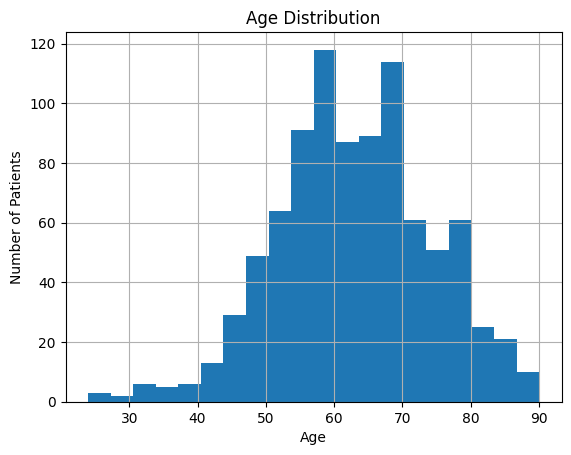

In [130]:
# Basic statistics for age
print(respiratory_sample['age'].describe())
# For a more visual representation, you can plot a histogram
import matplotlib.pyplot as plt

respiratory_sample['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

## Divided the document into sentences to accommodate the 512-token limitation of the BERT model

In [153]:
import torch
import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize

In [154]:
df3 = pd.read_csv('respiratory_sample.csv')

### Python Text Preprocessing and DataFrame Processing

#### Function: `preprocess_text`
- **Purpose**: Cleans the text data by converting it to lowercase, removing non-ASCII characters, and normalizing whitespace.
- **Operations**:
  - Converts all text to lowercase.
  - Removes any non-ASCII characters and replaces them with a space.
  - Replaces sequences of three or more non-alphanumeric characters with a single space.
  - Collapses multiple spaces into a single space.
  - Trims leading and trailing whitespace.

#### DataFrame Processing:
- **Data Loading**: Loads data from a CSV file named 'df_merged_table.csv'.
- **Data Cleaning**:
  - Removes rows where the 'NOTE_TXT' column is NaN.
  - Filters rows to retain only those where 'NOTE_TXT' is at least 10 characters long.
- **Text Preprocessing**:
  - Applies the `preprocess_text` function to the 'NOTE_TXT' column to clean the text data.

### Summary
This script defines a text preprocessing function and applies it to clean and format text data in a DataFrame loaded from a CSV file. The preprocessing steps are crucial for subsequent data analysis or machine learning tasks, ensuring data uniformity and readability.


In [155]:
def preprocess_text(text):
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Replace 3 or more consecutive non-alphanumeric characters with 1 white space
    text = re.sub(r'[^a-zA-Z0-9\s]{3,}', ' ', text)
    
    # Replace 2 or more consecutive white spaces with 1 white space
    text = re.sub(r'\s{2,}', ' ', text)
    
    return text.strip()  # Trim whitespace from beginning and end

    # Load the chunk
    df3 = pd.read_csv('df_merged_table.csv')
    
    # Preprocess the chunk
    df3.dropna(subset=['NOTE_TXT'], inplace=True)
    df3 = df[df['NOTE_TXT'].str.len() >= 10]
    df3['NOTE_TXT'] = df['NOTE_TXT'].apply(preprocess_text)

### Sentence Tokenization and Grouping Functions

This Python script includes two main functions for processing text data suitable for BERT-like models, which have a token limit per input:

1. **Tokenize Sentences**:
   - **Function:** `tokenize_sentences`
   - **Description:** Uses NLTK's `sent_tokenize` to break down text into individual sentences. This function takes a string of text and returns a list of sentences.

2. **Group Sentences**:
   - **Function:** `group_sentences`
   - **Purpose:** Groups sentences into chunks with a combined maximum token length of 500 to comply with BERT's token limitation of 512 tokens per input.
   - **Method:** Iterates through each sentence, counting tokens and grouping them. If adding another sentence would exceed 500 tokens, the current group is saved and a new group starts with the next sentence.
   - **Output:** Returns a list of sentence groups, each a list of sentences that together do not exceed 500 tokens.

### Application:
- These functions are designed to preprocess text data by first breaking it into manageable sentences and then grouping these sentences into segments. Each segment is sized to optimize the input requirements for models like BERT, ensuring efficient processing without losing contextual continuity.

### Summary
The `tokenize_sentences` and `group_sentences` functions work together to prepare textual data for NLP models, ensuring the text conforms to token limitations while maintaining the integrity of the data's original structure.


In [156]:
#1) tokenize_sentences function to tokenize sentences using sent_tokenize
#2) group_sentences function to group sentences into chunks
#- For text less than 500 tokens, it remains unchanged
#- For text with 500 tokens or more, it slices the text into chunks with a maximum length of 500 tokens
#3) Store sentences in a new dataframe with each row containing a sliced text segment as 'SentText', its original ID, and a unique sentence ID to track the sliced text back to its original text
#'''

# Tokenize sentences using nltk's sent_tokenize
def tokenize_sentences(text):
    return sent_tokenize(text)

# Function to group sentences with a maximum length of 500 tokens (to meet BERT's rule of 512 tokens)
def group_sentences(sentences):
    grouped_sentences = []
    current_group = []
    current_length = 0

    for sentence in sentences:
        sentence_length = len(sentence.split())

        if current_length + sentence_length <= 500:
            current_group.append(sentence)
            current_length += sentence_length
        else:
            if current_group:
                grouped_sentences.append(current_group)
                current_group = [sentence]
                current_length = sentence_length

    if current_group:
        grouped_sentences.append(current_group)

    return grouped_sentences

### Text Processing and Sentence Segmentation

This script processes text data from a DataFrame, segmenting it into individual sentences and grouping them to meet tokenization limitations for NLP models like BERT.

1. **Initialize Variables**:
   - A variable `current_sent_id` is initialized to maintain continuity in assigning unique sentence IDs. 

2. **Data Filtering**:
   - Rows with non-string values or missing values in the 'NOTE_TXT' column are filtered out, ensuring only valid text data is processed.

3. **Sentence Tokenization and Grouping**:
   - Custom functions `tokenize_sentences` and `group_sentences` are applied to the 'NOTE_TXT' column. 
   - `tokenize_sentences` breaks the text into individual sentences, while `group_sentences` groups them into segments with a maximum token limit.

4. **Generate New Rows**:
   - Using list comprehension, new rows are generated for each segment of grouped sentences, containing the Note ID, a unique sentence ID (`SentID`), and the grouped sentence text.

5. **Create Processed DataFrame**:
   - A new DataFrame `df_sent` is created to store the processed sentences, including the Note ID, sentence ID, and segmented text.

6. **Save to CSV**:
   - The processed DataFrame is saved to a new CSV file named `df_clean_merged_table.csv`, ready for further analysis or model training.

### Note:
- This script efficiently processes text data, segmenting it into manageable units suitable for NLP tasks while maintaining the continuity of sentence IDs across segments.


In [158]:

# Initialize to maintain continuity, though in a single-file scenario, it might be less relevant
current_sent_id = 1

# Filter out rows with non-string values or missing values in the 'NOTE_TXT' column
df3 = df3[df3['NOTE_TXT'].apply(lambda x: isinstance(x, str) and bool(x.strip()))]

# Assuming 'tokenize_sentences' and 'group_sentences' are your custom functions for processing the text
# Apply sentence tokenization and grouping to the 'NOTE_TXT' column
df3['Sentences'] = df3['NOTE_TXT'].apply(tokenize_sentences)
df3['GroupedSentences'] = df3['Sentences'].apply(group_sentences)

# Use a list comprehension for generating new rows
new_rows = [{'Note_ID': row['Note_ID'], 'SentID': current_sent_id + idx, 'SentText': ' '.join(group)}
            for _, row in df3.iterrows()
            for idx, group in enumerate(row['GroupedSentences'])]
current_sent_id += len(new_rows)

# Create a new DataFrame for the processed sentences
df_sent = pd.DataFrame(new_rows, columns=['Note_ID', 'SentID', 'SentText'])

# Save the processed DataFrame to a new CSV file
df_sent.to_csv(f"df_clean_merged_table.csv", index=False)


## labeling sample dataset

### Loading Data and Summing Symptom Predictions

This Python script performs operations to load data and analyze symptom predictions:

1. **Load CSV File:**
   - The DataFrame `df_case` is created by loading data from the CSV file named 'Case_Sentences_BERTLabels.csv'. This file is assumed to contain labeled data for analysis.

2. **Display DataFrame Columns:**
   - Prints the names of all columns in `df_case` to provide an overview of the dataset structure and available data fields.

3. **Identify Symptom Prediction Columns:**
   - A list comprehension filters out column names that include the substring '_pred_50'. These columns are presumed to contain numerical predictions related to symptoms.

4. **Calculate Symptom Prediction Totals:**
   - The script sums the values across the identified symptom columns, resulting in `notes


In [137]:
# Load the uploaded CSV file
df_case = pd.read_csv('Case_Sentences_BERTLabels.csv')
print(df_case.columns)
symptom_columns = [col for col in df_case.columns if '_pred_50' in col]
notes_per_symptom = df_case[symptom_columns].sum()
notes_per_symptom

Fatigue_pred_50                 19
Disturbed_Sleep_pred_50          7
Depressed_Mood_pred_50          16
Constipation_pred_50            14
Anxiety_pred_50                  9
Shortness_of_Breath_pred_50    252
Swelling_pred_50               213
Nausea_pred_50                  16
Appetite_Loss_pred_50            7
Pain_pred_50                   170
Numbness_pred_50                35
Pruritus_pred_50                13
Impaired_Memory_pred_50          1
dtype: int64

### Analysis of Symptom Predictions

This Python script conducts a detailed analysis of symptom prediction data within a DataFrame `df_case`:

1. **Identify Relevant Columns:**
   - Extracts all column names from `df_case` that contain the substring '_pred_50'. These columns are assumed to hold prediction counts for various symptoms.

2. **Calculate Symptom Counts:**
   - Sums the values across each identified symptom column, providing a total count of predictions per symptom.

3. **Calculate Total Predictions:**
   - Computes the sum of all symptom counts to establish a baseline for percentage calculations.

4. **Determine Symptom Percentages:**
   - Calculates the percentage each symptom contributes to the total predictions, giving insight into the prevalence of each symptom within the data.

5. **Create Summary DataFrame:**
   - Constructs a DataFrame `symptom_summary` with columns for symptom names, counts, and percentages. This table is designed to present a clear and concise summary of the data, facilitating easy analysis and reporting.

### Summary

This script efficiently extracts, computes, and visualizes critical information regarding symptom predictions. It offers a structured overview of symptom distribution, making it a valuable tool for understanding disease prevalence or the effectiveness of diagnostic algorithms.


In [138]:
# Assuming 'df_case' is your DataFrame containing the data
# Getting all columns that contain '_pred_50' in their names
symptom_columns = [col for col in df_case.columns if '_pred_50' in col]

# Summing up the counts of each symptom column
notes_per_symptom = df_case[symptom_columns].sum()

# Calculating the total of all sums to find the percentage contribution of each symptom
total_symptoms = notes_per_symptom.sum()

# Calculating the percentage of each symptom
symptom_percentages = (notes_per_symptom / total_symptoms) * 100

# Creating a DataFrame to store both counts and percentages
symptom_summary = pd.DataFrame({
    'Symptom': symptom_columns,
    'Count': notes_per_symptom.values,
    'Percentage': symptom_percentages.values
})

symptom_summary


,Symptom,Count,Percentage
0,Fatigue_pred_50,19,2.461140
1,Disturbed_Sleep_pred_50,7,0.906736
2,Depressed_Mood_pred_50,16,2.072539
3,Constipation_pred_50,14,1.813472
4,Anxiety_pred_50,9,1.165803
5,Shortness_of_Breath_pred_50,252,32.642487
6,Swelling_pred_50,213,27.590674
7,Nausea_pred_50,16,2.072539
8,Appetite_Loss_pred_50,7,0.906736
9,Pain_pred_50,170,22.020725
